## Project Name : - Flight Fare Prediction

### 1) Problem statement.

Travelling through flights has become an integral part of today’s lifestyle as more and more people are opting for faster travelling options. The flight ticket prices increase or decrease every now and then depending on various factors like timing of the flights, destination, and duration of flights various occasions such as vacations or festive season. Therefore, having some basic idea of the flight fares before planning the trip will surely help many people save money and time.
The main goal is to predict the fares of the flights based on different factors available in
the provided dataset.

Dataset link:
  https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh

### 2) Data Collection

#### 2.1) Import Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### 3) Data Exploration

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Shape of the dataset**

In [5]:
df.shape

(10683, 11)

**summary of the dataset**

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


As only one column of numerical datatype that too the target feature{dependent variable}

In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
# define numerical and categorical featutres
num_fea = [fea for fea in df.columns if df[fea].dtype !='O']
cat_fea = [fea for fea in df.columns if df[fea].dtype =='O']

# print
print(f'We have {len(num_fea)} numerical features : {num_fea}')
print(f'We have {len(cat_fea)} categorical features : {cat_fea}')

We have 1 numerical features : ['Price']
We have 10 categorical features : ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


#### Feature information:
* Airline: Name of the Airline from which the Ticket is Booked.
* Date_of_Journey: Date of Journey of the Traveller.
* Source: Source from which the Airline Would Departure.
* Destination: Destination to Which Airline Would Arrive.
* Route: Route of the Airline from Source to Destination.
* Dep_Time: Time at which Flight Would Departure from the Source.
* Arrival_Time: Time at which Flight Would Arrive at the Destination.
* Duration: Duration that Airline Takes to fly from Source to Destination.
* Total_Stops: Total No of Stops that Airline takes Between Source and Destination.
* Additional_Info: Any Additional Info about the Airline.
* Price: Fare of the Ticket to fly from Source to Destination.

In [9]:
#proportion of value_counts of each categorical columns
for col in cat_fea:
 print(df[col].value_counts(normalize=True)*100)
 print('----------------------------')

Jet Airways                          36.029205
IndiGo                               19.217448
Air India                            16.399888
Multiple carriers                    11.195357
SpiceJet                              7.657025
Vistara                               4.483759
Air Asia                              2.986053
GoAir                                 1.815969
Multiple carriers Premium economy     0.121689
Jet Airways Business                  0.056164
Vistara Premium economy               0.028082
Trujet                                0.009361
Name: Airline, dtype: float64
----------------------------
18/05/2019    4.717776
6/06/2019     4.708415
21/05/2019    4.652251
9/06/2019     4.633530
12/06/2019    4.614809
9/05/2019     4.530563
21/03/2019    3.959562
15/05/2019    3.791070
27/05/2019    3.575775
27/06/2019    3.323037
24/06/2019    3.285594
1/06/2019     3.201348
3/06/2019     3.117102
15/06/2019    3.070299
24/03/2019    3.023495
6/03/2019     2.883085
27/03/201

### Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable

**Categorical Features**

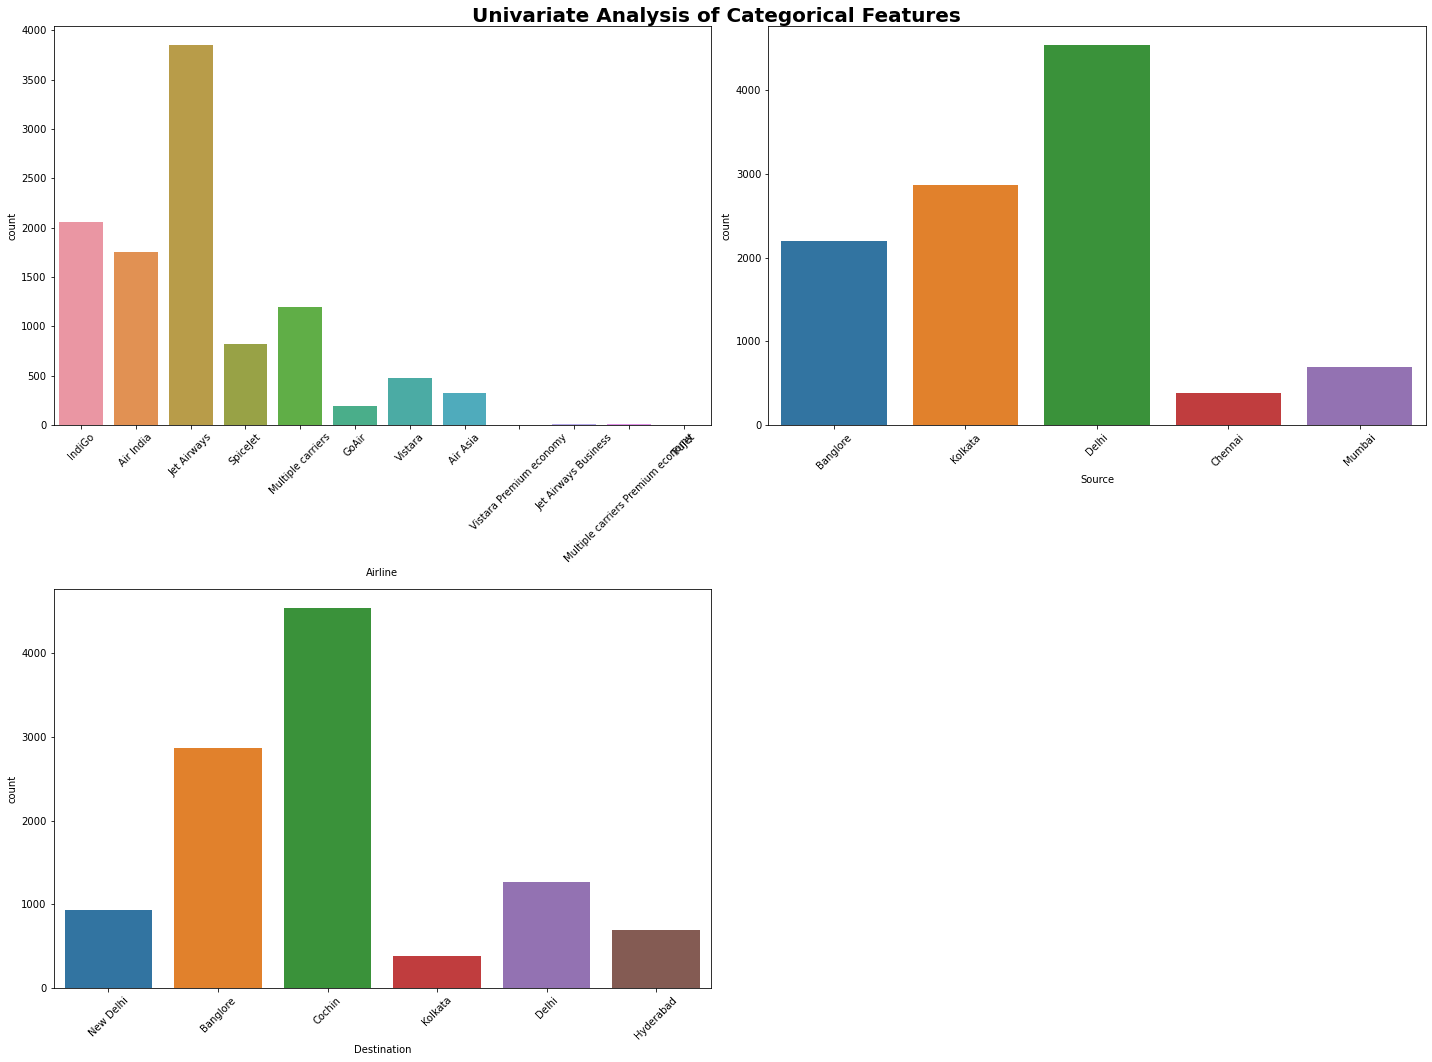

In [10]:
# categorical columns
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold')
cat1 = [ 'Airline','Source', 'Destination']
for i in range(0, len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

In [11]:
def detail_info(data):
    df1 = pd.DataFrame(index= data.columns)
    
    df1["data_type"]= data.dtypes
    df1["unique_val"]= data.nunique()
    df1["duplicate_val"]= data.duplicated().sum()
    df1["null_values"] = data.isnull().sum()
    df1["null_values_%"] = round(data.isnull().mean()*100,2)
    
    return df1


In [12]:
detail_info(df)

,data_type,unique_val,duplicate_val,null_values,null_values_%
Airline,object,12,220,0,0.00
Date_of_Journey,object,44,220,0,0.00
Source,object,5,220,0,0.00
Destination,object,6,220,0,0.00
Route,object,128,220,1,0.01
Dep_Time,object,222,220,0,0.00
Arrival_Time,object,1343,220,0,0.00
Duration,object,368,220,0,0.00
Total_Stops,object,5,220,1,0.01
Additional_Info,object,10,220,0,0.00


In [13]:
#using df.info() gives datatypes and non null vlaues' count of the columns, so it is not as detailed as the one we created above

#### Observation:
* There is one value missing in both "Route" and "Total_Stops" columns.
* There are 220 Duplicate records

### 4) Data Preprocessing

**Handling null values**

In [14]:
df[df["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [15]:
df.isnull().values.sum()

2

In [16]:
# Since only one record with null values, we may delete the record
df.dropna(inplace= True)
df.reset_index(drop= True, inplace = True)

**Handling duplicated values**

In [17]:
df[df.duplicated()]
# all the duplicate records

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10593,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10615,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10633,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10671,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [18]:
df.drop_duplicates(keep='first',inplace = True)
df.reset_index(drop = True, inplace = True)

In [19]:
detail_info(df)

,data_type,unique_val,duplicate_val,null_values,null_values_%
Airline,object,12,0,0,0.0
Date_of_Journey,object,44,0,0,0.0
Source,object,5,0,0,0.0
Destination,object,6,0,0,0.0
Route,object,128,0,0,0.0
Dep_Time,object,222,0,0,0.0
Arrival_Time,object,1343,0,0,0.0
Duration,object,368,0,0,0.0
Total_Stops,object,5,0,0,0.0
Additional_Info,object,10,0,0,0.0


In [20]:
df.shape

(10462, 11)

**handling categorical columns**

In [21]:
def sep_date_month_year(data, col):
    data['date'] = data[col].str.split("/").str[0]
    data['month'] = data[col].str.split("/").str[1]
    data['year'] = data[col].str.split("/").str[2]
    
    data['date'] = data['date'].astype(int)
    data['month'] = data['month'].astype(int)
    data['year'] = data['year'].astype(int)
    
    data.drop(col, axis=1, inplace= True)
    #data.reset_index(drop = True, inplace = True)

In [22]:
sep_date_month_year(df,"Date_of_Journey")

In [23]:
def sep_hr_min(data,col):
    data[col+"_hour"]= data[col].str.split(":").str[0]
    data[col+"_min"] = data[col].str.split(":").str[1]
    data[col+"_hour"] = data[col+"_hour"].astype(int)
    data[col+"_min"] = data[col+"_min"].astype(int)
    data.drop(col, axis=1, inplace = True)
    #data.reset_index(drop = True, inplace = True)

In [24]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [25]:
df["Arrival_Time"] = df["Arrival_Time"].str.split(" ").str[0]

In [26]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [27]:
sep_hr_min(df, "Dep_Time")
sep_hr_min(df, "Arrival_Time")

In [28]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [29]:
def abc(data, col):
    for i in range(len(data[col])):
        if "h" not in data[col][i]:
            data[col][i]= data[col][i].replace(data[col][i], "0h "+ data[col][i])
        elif "m" not in data[col][i]:
            data[col][i]= data[col][i].replace(data[col][i], data[col][i]+ " 0m")
            
##using this because if separating hours and minutes without doing it would create null values in hours column or in min column, so its better to address this now becasue at time whike addressing null values collectively we would not abele to address them properly/specifically.

In [30]:
abc(df, "Duration")

In [31]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10458,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10459,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,8,20,11,20
10460,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


In [32]:
def duration_hr_min(data, col):
    data[col+' hour'] = data[col].str.split(" ").str[0].str.replace('h','')
    data[col+' min'] = data[col].str.split(" ").str[1].str.replace('m','')
    data[col+' hour'] = data[col+' hour'].astype(int)
    data[col+' min'] = data[col+' min'].astype(int)
    data.drop(col, axis=1, inplace = True)
    #data.reset_index(drop = True, inplace = True)

In [33]:
duration_hr_min(df, "Duration")

In [34]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration hour,Duration min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30
10458,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35
10459,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0
10460,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40


In [35]:
df[df["Duration hour"]==0]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration hour,Duration min
6397,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,2019,16,50,16,55,0,5


In [36]:
##Its not possible to complete journey within 0 hour, so remove it
df.drop(6397, inplace = True)
df.reset_index(drop = True, inplace = True)

In [37]:
detail_info(df)

,data_type,unique_val,duplicate_val,null_values,null_values_%
Airline,object,12,2,0,0.0
Source,object,5,2,0,0.0
Destination,object,6,2,0,0.0
Route,object,128,2,0,0.0
Total_Stops,object,5,2,0,0.0
Additional_Info,object,10,2,0,0.0
Price,int64,1870,2,0,0.0
date,int32,10,2,0,0.0
month,int32,4,2,0,0.0
year,int32,1,2,0,0.0


**remaining categorical columns: Airline, Source, Destination, Route, Total_Stops, Additional_info**

In [38]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [39]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [40]:
df['Airline'] = labelencoder.fit_transform(df["Airline"])

In [41]:
df['Airline'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [42]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [43]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [44]:
## "Delhi" and "New Delhi" should be same
df["Destination"] = df["Destination"].replace("New Delhi", "Delhi")

**Both Source and Destination should have same encoding for respective cities**

In [45]:
sd_dict = {'Banglore':0, 'Kolkata':1, 'Delhi':2, 'Chennai':3, 'Mumbai':4, 'Cochin':5, 'Hyderabad':6}
df["Source"] = df["Source"].map(sd_dict)
df["Destination"] = df["Destination"].map(sd_dict)

In [46]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [47]:
ts_dict = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
df['Total_Stops']= df['Total_Stops'].map(ts_dict)

In [48]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [49]:
df["Additional_Info"]= df["Additional_Info"].replace("No Info", "No info")

In [50]:
df["Additional_Info"]= labelencoder.fit_transform(df["Additional_Info"])

In [51]:
detail_info(df)

,data_type,unique_val,duplicate_val,null_values,null_values_%
Airline,int32,12,2,0,0.0
Source,int64,5,2,0,0.0
Destination,int64,5,2,0,0.0
Route,object,128,2,0,0.0
Total_Stops,int64,5,2,0,0.0
Additional_Info,int32,9,2,0,0.0
Price,int64,1870,2,0,0.0
date,int32,10,2,0,0.0
month,int32,4,2,0,0.0
year,int32,1,2,0,0.0


In [52]:
## dropping Route because Route and Total_Stops are related to each other; and Dropping "year" beacause it has only one value in all the records
df.drop(['Route', 'year'], axis =1, inplace = True)
#df.reset_index(drop=True, inplace =True)

In [53]:
##Reordering the columns
cols = ['date', 'month', 'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour','Arrival_Time_min', 
        'Duration hour','Duration min','Airline','Source', 'Destination','Total_Stops', 'Additional_Info', 'Price']

df = df.reindex(cols, axis =1)

In [54]:
df.drop_duplicates(keep= 'first', inplace = True)
df.reset_index(drop = True, inplace = True)

In [55]:
detail_info(df)

,data_type,unique_val,duplicate_val,null_values,null_values_%
date,int32,10,0,0,0.0
month,int32,4,0,0,0.0
Dep_Time_hour,int32,24,0,0,0.0
Dep_Time_min,int32,12,0,0,0.0
Arrival_Time_hour,int32,24,0,0,0.0
Arrival_Time_min,int32,12,0,0,0.0
Duration hour,int32,43,0,0,0.0
Duration min,int32,12,0,0,0.0
Airline,int32,12,0,0,0.0
Source,int64,5,0,0,0.0


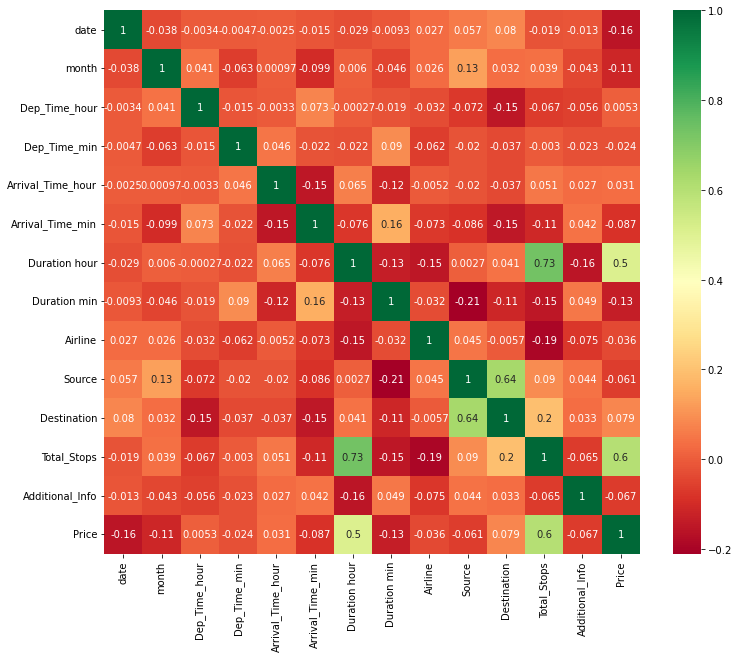

In [56]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

**Handling Outliers in "Price" as this is the only numerical feature**

<AxesSubplot:xlabel='Price', ylabel='Density'>

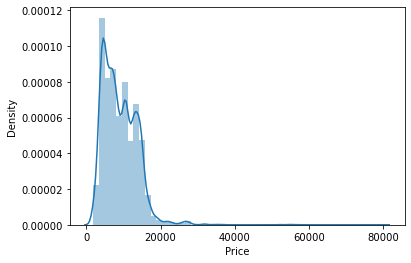

In [57]:
sns.distplot(df["Price"])

<AxesSubplot:xlabel='Price'>

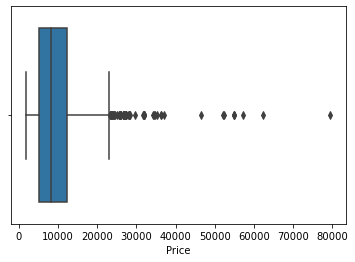

In [58]:
sns.boxplot(df["Price"])

In [59]:
len(df[df["Price"]>30000])

24

In [60]:
df["Price"]= np.where(df['Price']>=30000, df['Price'].median(), df['Price'])

**performing same steps with the new data**

In [61]:
df1 = pd.read_excel("Test_set.xlsx")

In [62]:
# define numerical and categorical featutres
num_fea = [fea for fea in df1.columns if df1[fea].dtype !='O']
cat_fea = [fea for fea in df1.columns if df1[fea].dtype =='O']

# print
print(f'We have {len(num_fea)} numerical features : {num_fea}')
print(f'We have {len(cat_fea)} categorical features : {cat_fea}')

We have 0 numerical features : []
We have 10 categorical features : ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


In [63]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [64]:
detail_info(df1)

,data_type,unique_val,duplicate_val,null_values,null_values_%
Airline,object,11,26,0,0.0
Date_of_Journey,object,44,26,0,0.0
Source,object,5,26,0,0.0
Destination,object,6,26,0,0.0
Route,object,100,26,0,0.0
Dep_Time,object,199,26,0,0.0
Arrival_Time,object,704,26,0,0.0
Duration,object,320,26,0,0.0
Total_Stops,object,5,26,0,0.0
Additional_Info,object,6,26,0,0.0


In [65]:
df1.drop_duplicates(keep='first', inplace =True)
df1.reset_index(drop = 'True', inplace =True)

In [66]:
##data preprocessing
sep_date_month_year(df1,"Date_of_Journey")

df1["Arrival_Time"] = df1["Arrival_Time"].str.split(" ").str[0]
sep_hr_min(df1, "Dep_Time")
sep_hr_min(df1, "Arrival_Time")

abc(df1, "Duration")
duration_hr_min(df1, "Duration")

In [67]:
df1[df1["Duration hour"]==0]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,date,month,year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration hour,Duration min
2634,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,12,3,2019,16,50,16,55,0,5


In [68]:
df1.drop(2634, inplace = True)
df1.reset_index(drop = True, inplace = True)

In [69]:
df1['Airline'] = labelencoder.fit_transform(df1["Airline"])

df1["Destination"] = df1["Destination"].replace("New Delhi", "Delhi")
df1["Source"] = df1["Source"].map(sd_dict)
df1["Destination"] = df1["Destination"].map(sd_dict)

df1['Total_Stops']= df1['Total_Stops'].map(ts_dict)

df["Additional_Info"]= df["Additional_Info"].replace("No Info", "No info")
df["Additional_Info"]= labelencoder.fit_transform(df["Additional_Info"])

df1.drop(['Route', 'year'], axis =1, inplace = True)
#df1.reset_index(drop=True, inplace =True)

##Reordering the columns
colss = ['date', 'month', 'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour','Arrival_Time_min', 
        'Duration hour','Duration min','Airline','Source', 'Destination','Total_Stops','Additional_Info'] 
df1 = df1.reindex(colss, axis =1)

In [70]:
detail_info(df1)

,data_type,unique_val,duplicate_val,null_values,null_values_%
date,int32,10,1,0,0.0
month,int32,4,1,0,0.0
Dep_Time_hour,int32,24,1,0,0.0
Dep_Time_min,int32,12,1,0,0.0
Arrival_Time_hour,int32,24,1,0,0.0
Arrival_Time_min,int32,12,1,0,0.0
Duration hour,int32,40,1,0,0.0
Duration min,int32,12,1,0,0.0
Airline,int32,11,1,0,0.0
Source,int64,5,1,0,0.0


In [71]:
df1.drop_duplicates(keep= 'first', inplace = True)
df1.reset_index(drop = True, inplace = True)

In [72]:
X =df.iloc[:,:-1]
y = df.iloc[:,-1]

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .20, random_state = 42)

In [74]:
X_train.shape

(8367, 13)

In [75]:
X_test.shape

(2092, 13)

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [77]:
metrics = pd.DataFrame(index = ['Train_Score', 'Test_Score', 'CV_Score', 'Train_Score_Tuned', 'Test_Score_Tuned', 'MAE_Tuned', 'MSE_Tuned', 'RMSE_Tuned'], 
                       columns = ['LinearReg', 'LR_Lasso', 'LR_Ridge', 'ElasticNet', 'KNeighborsReg', 'DecisionTreeReg', 'RandomForestReg'])

In [78]:
metrics

,LinearReg,LR_Lasso,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg
Train_Score,NaN,NaN,NaN,NaN,NaN,NaN
Test_Score,NaN,NaN,NaN,NaN,NaN,NaN
CV_Score,NaN,NaN,NaN,NaN,NaN,NaN
Train_Score_Tuned,NaN,NaN,NaN,NaN,NaN,NaN
Test_Score_Tuned,NaN,NaN,NaN,NaN,NaN,NaN
MAE_Tuned,NaN,NaN,NaN,NaN,NaN,NaN
MSE_Tuned,NaN,NaN,NaN,NaN,NaN,NaN
RMSE_Tuned,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
models = []

models.append(('LinearReg',LinearRegression()))
models.append(('LR_Lasso',Lasso()))
models.append(('LR_Ridge',Ridge()))
models.append(('ElasticNet',ElasticNet()))

models.append(('KNeighborsReg',KNeighborsRegressor()))
models.append(('DecisionTreeReg',DecisionTreeRegressor()))
models.append(('RandomForestReg',RandomForestRegressor()))

In [80]:
models

[('LinearReg', LinearRegression()),
 ('LR_Lasso', Lasso()),
 ('LR_Ridge', Ridge()),
 ('ElasticNet', ElasticNet()),
 ('KNeighborsReg', KNeighborsRegressor()),
 ('DecisionTreeReg', DecisionTreeRegressor()),
 ('RandomForestReg', RandomForestRegressor())]

In [81]:
for name, model in models:
    temp_model = model.fit(X_train, y_train)
    result = temp_model.score(X_train, y_train)                                           ##this gives the score of the model on training data, after seeing its docstring came to know that it used R-Squarred method                   
    metrics.loc['Train_Score', name] = round(result*100,4)                                ##saving the score of particular model in the "metrics" dataframe
  
    y_pred = temp_model.predict(X_test)                                                   ##using the model predicting the test data's output
    metrics.loc['Test_Score', name] = round(r2_score(y_test,y_pred)*100,4)                ##calculating the score of the test data's output using R-Squared method
    
    # calculating cross_validated score on teh training data, as this is generally a better measure of the model performance,,,,,,,,,NOTE: the purpose of the cross-validation is to estimate the model's performance on unseen data by evaluating it on multiple subsets of the training data, it helps in assessing how well the model generalises to new , unseen instances.
    cv_score = cross_val_score(model, X_train, y_train, cv = 5, n_jobs=-1, scoring ='r2') ##'cross_val_score' function returns an array of scores, where each score represents the performance of the model on a specific fold of cross_validation, here i provided `scoring='r2'`, so it will calculate the R-squared scores for each fold.
    metrics.loc['CV_Score', name] = round(cv_score.mean()*100,4)                          ##calculating the mean of all the scores of the folds                                           
    print(f"{name:{13}} {cv_score} {cv_score.mean():{18}} {cv_score.std():{18}}")         ##calculated the standard deviation of the cross validated scores, it provids information about consistency and reliability of the model's performance across different folds.smaller standard deviation suggests that the model's performance is relatively consistent and stable across different subsets of the training data. Conversely, a larger standard deviation indicates greater variability in the model's performance.
    ##Typicaly test data is used to assess the final performance of th emodel after it has been trained and tuned using the training data and cross-validation.

LinearReg     [0.47640205 0.49258576 0.48156121 0.48605938 0.45685307] 0.47869229271337377 0.012146851129489145
LR_Lasso      [0.47647821 0.49258034 0.48156903 0.48599972 0.45684586] 0.4786946316555378 0.01213854115868339
LR_Ridge      [0.4764164  0.49258802 0.48155438 0.48605367 0.45684945] 0.4786923831759706 0.012147115592675457
ElasticNet    [0.41825857 0.42586628 0.41143854 0.41327403 0.3872235 ] 0.4112121865683762 0.012993486345295202
KNeighborsReg [0.62767313 0.64505669 0.62376548 0.59486063 0.63192956] 0.6246570979797308 0.01653332028372965
DecisionTreeReg [0.81249445 0.85056822 0.85075429 0.83063216 0.82000432] 0.8328906888499024 0.015612618723243524
RandomForestReg [0.87240302 0.89163137 0.89924673 0.90109316 0.89485504] 0.8918458630343684 0.010270446568176675


In [82]:
metrics

,LinearReg,LR_Lasso,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg,LR_Ridge
Train_Score,48.1224,48.1223,41.3618,77.9363,99.6077,98.331,48.1224
Test_Score,47.51,47.5087,40.8835,63.4804,80.313,90.3204,47.5106
CV_Score,47.8692,47.8695,41.1212,62.4657,83.2891,89.1846,47.8692
Train_Score_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Test_Score_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAE_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSE_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RMSE_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Difference** bwteeen Lasso() and LassoCV() is in how they handle th eselection of the regularisation parameter(alpha) for Lassso regularisation.

**Lasso(L1 Regularisation)**
* Lasso, which stands for Least Absolute Shrinkage and Selection Operator, is a linear regression model that applies L1 regularization.
* Lasso adds a penalty term to the ordinary least squares (OLS) loss function, which is the sum of squared differences between the predicted and actual values.
* The penalty term is the absolute sum of the coefficients multiplied by a regularization parameter (alpha). This penalty encourages sparsity in the coefficient values by driving some of them to zero.
* Lasso performs feature selection by effectively shrinking the coefficients of less important features to zero. This allows the model to focus on the most relevant features.
* The optimal value of alpha, which determines the strength of regularization, needs to be specified by the user.

**LassoC(Lasso with Cross Validation**
* LassoCV is an extension of Lasso that automates the selection of the optimal alpha value using cross-validation.
* It performs k-fold cross-validation internally, where the dataset is divided into k equal-sized folds.
* In each iteration of cross-validation, one fold is used as the validation set, and the remaining folds are used as the training set.
* For each iteration, LassoCV fits a Lasso model using a specific alpha value on the training data and evaluates its performance on the validation set.
* The optimal alpha value is selected based on the alpha value that achieves the best performance, typically measured by a specified scoring metric (e.g., R-squared or mean squared error).
* Once the optimal alpha value is determined, a final Lasso model is trained using the entire training dataset with the selected alpha value.

In **summary**, the main difference is that Lasso requires you to manually specify the alpha value, while LassoCV automates the selection of the optimal alpha value through cross-validation. LassoCV is a convenient way to perform hyperparameter tuning for Lasso regression, as it simplifies the process by automatically searching for the best regularization parameter.

In [85]:
lassocv = LassoCV(alphas = None, cv= 10, max_iter = 200000, random_state = 42)    #here alphas = None, because we will be finding it, although we can give a range of values to decide the best out of them; cv = 10 will divide the dataset in 10 equal sized folds and cross validation process will iterate 10 times, where each fold will be used as the validation set once, an dthe remaining 9 folds will be used as the training set; max_iter = 200000{by setting 'max_iter' we can control the number of ierations performed by the algorithm to estimate the coefficients. if the algorithm does not converge(i.e., does not reach stsfactory solution) within specified maximum number of iterations, it will stop and return the current solution} is used in the coordinate descent algorithm (a widely used optimisation method that is being used here in Lassso regression), overall this coordinate descent algorithm plays a crucial role in efficiently estimating the coefficinets in lasso regression and other regularisation techniques by iteratively updating the model's parameters while optimizing the objective function{{{{in simple words "By updating one variable at a time while keeping the others fixed, the algorithm gradually finds better values for each variable that collectively minimize the function. The process continues iteratively until the values of the variables stabilize or the maximum number of iterations is reached."}}}}
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=200000, random_state=42)

In [86]:
#most optimal alpha value
lassocv.alpha_

19.746845097073507

In [88]:
lasso_tuned = Lasso(alpha = lassocv.alpha_)
lasso_tuned.fit(X_train, y_train)
metrics.loc['Train_Score_Tuned', 'LR_Lasso'] = round(lasso_tuned.score(X_train, y_train)*100,4)

In [89]:
y_pred_lasso = lasso_tuned.predict(X_test)

metrics.loc['Test_Score_Tuned', 'LR_Lasso'] = round(r2_score(y_test, y_pred_lasso)*100,4)
metrics.loc['MAE_Tuned', 'LR_Lasso'] = mean_absolute_error(y_test, y_pred_lasso)
metrics.loc['MSE_Tuned', 'LR_Lasso'] = mean_squared_error(y_test, y_pred_lasso)
metrics.loc['RMSE_Tuned', 'LR_Lasso'] = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

In [90]:
metrics

,LinearReg,LR_Lasso,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg,LR_Ridge
Train_Score,48.1224,48.1223,41.3618,77.9363,99.6077,98.331,48.1224
Test_Score,47.51,47.5087,40.8835,63.4804,80.313,90.3204,47.5106
CV_Score,47.8692,47.8695,41.1212,62.4657,83.2891,89.1846,47.8692
Train_Score_Tuned,NaN,48.102,NaN,NaN,NaN,NaN,NaN
Test_Score_Tuned,NaN,47.4654,NaN,NaN,NaN,NaN,NaN
MAE_Tuned,NaN,2338.543135,NaN,NaN,NaN,NaN,NaN
MSE_Tuned,NaN,9557540.120462,NaN,NaN,NaN,NaN,NaN
RMSE_Tuned,NaN,3091.52715,NaN,NaN,NaN,NaN,NaN


In [91]:
ridgecv = RidgeCV(alphas = np.arange(.1,10,100), cv=10)   ##in this either we manually provide a raneg of alpha values or let the model use the defalt sequnece; and regarding "max_iter" parameter that we used in LassoCV which determines the maximum number of iterations for the optimisation algorithm to converge. It is not required here because the optimisation algorithm for Ridge regression does not have iteration limit. It uses a closed form solution that can be directly calculated without iterations. 
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.1

In [92]:
ridge_tuned = Ridge(alpha=ridgecv.alpha_)
ridge_tuned.fit(X_train, y_train)
metrics.loc['Train_Score_Tuned', 'LR_Ridge'] = round(ridge_tuned.score(X_train,y_train)*100,4)

In [93]:
y_pred_rg = ridge_tuned.predict(X_test)

metrics.loc['Test_Score_Tuned', 'LR_Ridge'] = round(r2_score(y_test, y_pred_rg)*100,4)
metrics.loc['MAE_Tuned', 'LR_Ridge'] = mean_absolute_error(y_test, y_pred_rg)
metrics.loc['MSE_Tuned', 'LR_Ridge'] = mean_squared_error(y_test, y_pred_rg)
metrics.loc['RMSE_Tuned', 'LR_Ridge'] = np.sqrt(mean_squared_error(y_test, y_pred_rg))

In [95]:
## `ElasticNetCV` from scikit-learn, which is a cross-validated version of Elastic Net regression. In Elastic Net, the regularization term is a linear combination of L1 (Lasso) and L2 (Ridge) penalties. The hyperparameters in Elastic Net are `alpha` and `l1_ratio`.

elastic = ElasticNetCV(alphas = None, l1_ratio= np.arange(0.1,1.1,.1), cv =10)
elastic.fit(X_train, y_train)
elastic.alpha_

19.746845097073507

In [96]:
elastic.l1_ratio_

1.0

In [97]:
elastic_tuned = ElasticNet(alpha = elastic.alpha_, l1_ratio = elastic.l1_ratio_)
elastic_tuned.fit(X_train, y_train)
metrics.loc['Train_Score_Tuned', 'ElasticNet'] = round(elastic_tuned.score(X_train, y_train)*100,4)

In [98]:
y_pred_elastic = elastic_tuned.predict(X_test)

metrics.loc['Test_Score_Tuned', 'ElasticNet'] = round(r2_score(y_test, y_pred_elastic)*100,4)
metrics.loc['MAE_Tuned', 'ElasticNet'] = mean_absolute_error(y_test, y_pred_elastic)
metrics.loc['MSE_Tuned', 'ElasticNet'] = mean_squared_error(y_test, y_pred_elastic)
metrics.loc['RMSE_Tuned', 'ElasticNet'] = np.sqrt(mean_squared_error(y_test, y_pred_elastic))

In [99]:
metrics

,LinearReg,LR_Lasso,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg,LR_Ridge
Train_Score,48.1224,48.1223,41.3618,77.9363,99.6077,98.331,4.812240e+01
Test_Score,47.51,47.5087,40.8835,63.4804,80.313,90.3204,4.751060e+01
CV_Score,47.8692,47.8695,41.1212,62.4657,83.2891,89.1846,4.786920e+01
Train_Score_Tuned,NaN,48.102,48.102,NaN,NaN,NaN,4.812240e+01
Test_Score_Tuned,NaN,47.4654,47.4654,NaN,NaN,NaN,4.751010e+01
MAE_Tuned,NaN,2338.543135,2338.543135,NaN,NaN,NaN,2.340564e+03
MSE_Tuned,NaN,9557540.120462,9557540.120462,NaN,NaN,NaN,9.549407e+06
RMSE_Tuned,NaN,3091.52715,3091.52715,NaN,NaN,NaN,3.090211e+03


In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
# KNeighbor

param_grid = {'n_neighbors': np.arange(2,25,1),
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights' : ['uniform', 'distance'],
              'leaf_size': [10,20,30],
              'p' : [1,2],
              'metric': ['minkowski'],
              'n_jobs' : [-1]
                }


kn_model = GridSearchCV(KNeighborsRegressor(), param_grid, cv =3, scoring='accuracy')
kn_model.fit(X_train,y_train)
kn_model.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_jobs': -1,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'uniform'}

best parameter for the KNN model:
{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_jobs': -1,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'uniform'}

In [103]:
kn_model = KNeighborsRegressor(n_neighbors= 2, algorithm= 'auto', weights= 'uniform', leaf_size= 10, 
                               p =1 , metric= 'minkowski', n_jobs = -1)
kn_model.fit(X_train,y_train)
y_pred_kn = kn_model.predict(X_test)
r2_score(y_test, y_pred_kn)

0.6950139833622448

In [104]:
metrics.loc['Train_Score_Tuned', 'KNeighborsReg'] = round(kn_model.score(X_train,  y_train)*100,4)
metrics.loc['Test_Score_Tuned' , 'KNeighborsReg'] = round(r2_score(y_test,y_pred_kn)*100,4)

metrics.loc['MAE_Tuned', 'KNeighborsReg'] = mean_absolute_error(y_test, y_pred_kn)
metrics.loc['MSE_Tuned', 'KNeighborsReg'] = mean_squared_error(y_test, y_pred_kn)
metrics.loc['RMSE_Tuned', 'KNeighborsReg'] = np.sqrt(mean_squared_error(y_test, y_pred_kn))

metrics

,LinearReg,LR_Lasso,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg,LR_Ridge
Train_Score,48.1224,48.1223,41.3618,77.9363,99.6077,98.331,4.812240e+01
Test_Score,47.51,47.5087,40.8835,63.4804,80.313,90.3204,4.751060e+01
CV_Score,47.8692,47.8695,41.1212,62.4657,83.2891,89.1846,4.786920e+01
Train_Score_Tuned,NaN,48.102,48.102,90.0492,NaN,NaN,4.812240e+01
Test_Score_Tuned,NaN,47.4654,47.4654,69.5014,NaN,NaN,4.751010e+01
MAE_Tuned,NaN,2338.543135,2338.543135,1460.282266,NaN,NaN,2.340564e+03
MSE_Tuned,NaN,9557540.120462,9557540.120462,5548562.639221,NaN,NaN,9.549407e+06
RMSE_Tuned,NaN,3091.52715,3091.52715,2355.538715,NaN,NaN,3.090211e+03


In [105]:
# Decision Tree

param_grid = {'criterion' : ['squared_error', 'absolute_error'],
              'splitter': ['best', 'random'],
              'max_depth' : [2,4,6,8,10],
              'min_samples_leaf': np.arange(1,10,1),
              'max_features' : [2,4,6,8,10],
              'random_state' : [42]
             } 


dt_model = GridSearchCV(DecisionTreeRegressor(), param_grid, cv =5, scoring='r2')
dt_model.fit(X_train,y_train)
dt_model.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 7,
 'random_state': 42,
 'splitter': 'best'}

best parameters for Decision tree model:
{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 7,
 'random_state': 42,
 'splitter': 'best'}

In [106]:
dt_model = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 10, max_features= 10, min_samples_leaf= 7, splitter = 'best', random_state=42)
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
r2_score(y_test, y_pred_dt)

0.8447961088682446

In [107]:
metrics.loc['Train_Score_Tuned', 'DecisionTreeReg'] = round(dt_model.score(X_train, y_train)*100,4)
metrics.loc['Test_Score_Tuned' , 'DecisionTreeReg'] = round(r2_score(y_test,y_pred_dt)*100,4)

metrics.loc['MAE_Tuned', 'DecisionTreeReg'] = mean_absolute_error(y_test, y_pred_dt)
metrics.loc['MSE_Tuned', 'DecisionTreeReg'] = mean_squared_error(y_test, y_pred_dt)
metrics.loc['RMSE_Tuned', 'DecisionTreeReg'] = np.sqrt(mean_squared_error(y_test, y_pred_dt))

metrics

,LinearReg,LR_Lasso,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg,LR_Ridge
Train_Score,48.1224,48.1223,41.3618,77.9363,99.6077,98.331,4.812240e+01
Test_Score,47.51,47.5087,40.8835,63.4804,80.313,90.3204,4.751060e+01
CV_Score,47.8692,47.8695,41.1212,62.4657,83.2891,89.1846,4.786920e+01
Train_Score_Tuned,NaN,48.102,48.102,90.0492,87.9337,NaN,4.812240e+01
Test_Score_Tuned,NaN,47.4654,47.4654,69.5014,84.4796,NaN,4.751010e+01
MAE_Tuned,NaN,2338.543135,2338.543135,1460.282266,1008.61333,NaN,2.340564e+03
MSE_Tuned,NaN,9557540.120462,9557540.120462,5548562.639221,2823599.984317,NaN,9.549407e+06
RMSE_Tuned,NaN,3091.52715,3091.52715,2355.538715,1680.3571,NaN,3.090211e+03


In [ ]:
# Random Forest

param_grid = {'criterion' : ['squared_error', 'absolute_error'],
        'n_estimators' : [10,100,200,300],
        'max_depth' : [5,10,15,20],
        'max_features':  [5,6,7,8,9,10],
        'min_samples_leaf': [5,6,7,8,9,10],
        'oob_score' : [True,False],
        'n_jobs': [-1],
        'random_state': [42]
        }

rf_model = GridSearchCV(RandomForestRegressor(), param_grid, scoring='accuracy')
rf_model.fit(X_train,y_train)
rf_model.best_params_

In [110]:
rf_model = RandomForestRegressor(criterion= 'squared_error', n_estimators= 300, max_depth= 15, max_features= 9, min_samples_leaf= 10, oob_score=False)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
r2_score(y_test, y_pred_rf)

0.8803368819455836

In [111]:
metrics.loc['Train_Score_Tuned', 'RandomForestReg'] = round(rf_model.score(X_train, y_train)*100,4)
metrics.loc['Test_Score_Tuned' , 'RandomForestReg'] = round(r2_score(y_test,y_pred_rf)*100,4)

metrics.loc['MAE_Tuned', 'RandomForestReg'] = mean_absolute_error(y_test, y_pred_rf)
metrics.loc['MSE_Tuned', 'RandomForestReg'] = mean_squared_error(y_test, y_pred_rf)
metrics.loc['RMSE_Tuned', 'RandomForestReg'] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

metrics

,LinearReg,LR_Lasso,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg,LR_Ridge
Train_Score,48.1224,48.1223,41.3618,77.9363,99.6077,98.331,4.812240e+01
Test_Score,47.51,47.5087,40.8835,63.4804,80.313,90.3204,4.751060e+01
CV_Score,47.8692,47.8695,41.1212,62.4657,83.2891,89.1846,4.786920e+01
Train_Score_Tuned,NaN,48.102,48.102,90.0492,87.9337,89.612,4.812240e+01
Test_Score_Tuned,NaN,47.4654,47.4654,69.5014,84.4796,88.0337,4.751010e+01
MAE_Tuned,NaN,2338.543135,2338.543135,1460.282266,1008.61333,903.928197,2.340564e+03
MSE_Tuned,NaN,9557540.120462,9557540.120462,5548562.639221,2823599.984317,2177012.28879,9.549407e+06
RMSE_Tuned,NaN,3091.52715,3091.52715,2355.538715,1680.3571,1475.470192,3.090211e+03
